In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# read data
df = pd.read_csv('D:\BTL_Python_data\Khánh - Visualization\Data/Vehicle.csv')
df.head()

,vehicle_no,vehicleType,Current_Location,GenModel,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),EngineSizeSimple,max_power(bhp),seats,Driver_Name,Driver_MobileNo,LicenceStatus
0,KA590408,Mahindra LCV 1MT,New York,ABARTH 500,Maruti Swift Dzire VDI,2014.0,450000,145500,Diesel,Individual,Manual,First,23.40,1248,1400,74.00,5,RAMESH,7082423013,Licensed
1,TN30BC5917,Mahindra LCV 1MT,San Jose,ABARTH 595,Skoda Rapid 1.5 TDI Ambition,2014.0,370000,120000,Diesel,Individual,Manual,Second,21.14,1498,1400,103.52,5,RAMESH,7082423014,SORN
2,TN22AR2748,Mahindra LCV 1MT,Birmingham,ABARTH 595,Honda City 2017-2020 EXi,2006.0,158000,140000,Petrol,Individual,Manual,Third,17.70,1497,1400,78.00,5,GIRI,7082423015,Licensed
3,TN28AQ0781,Mahindra LCV 1MT,San Jose,ABARTH 595,Hyundai i20 Sportz Diesel,2010.0,225000,127000,Diesel,Individual,Manual,First,23.00,1396,1400,90.00,5,RAVI,7082423016,SORN
4,TN68F1722,Mahindra LCV 1MT,Boston,ABARTH 595,Maruti Swift VXI BSIII,2007.0,130000,120000,Petrol,Individual,Manual,First,16.10,1298,1400,88.20,5,TAMIL,7082423017,Licensed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vehicle_no        9982 non-null   object 
 1   vehicleType       9982 non-null   object 
 2   Current_Location  9982 non-null   object 
 3   GenModel          9982 non-null   object 
 4   name              9982 non-null   object 
 5   year              9982 non-null   float64
 6   selling_price     9982 non-null   int64  
 7   km_driven         9982 non-null   int64  
 8   fuel              9982 non-null   object 
 9   seller_type       9982 non-null   object 
 10  transmission      9982 non-null   object 
 11  owner             9982 non-null   object 
 12  mileage (kmpl)    9982 non-null   float64
 13  engine (CC)       9982 non-null   int64  
 14  EngineSizeSimple  9982 non-null   object 
 15  max_power(bhp)    9982 non-null   float64
 16  seats             9982 non-null   int64  


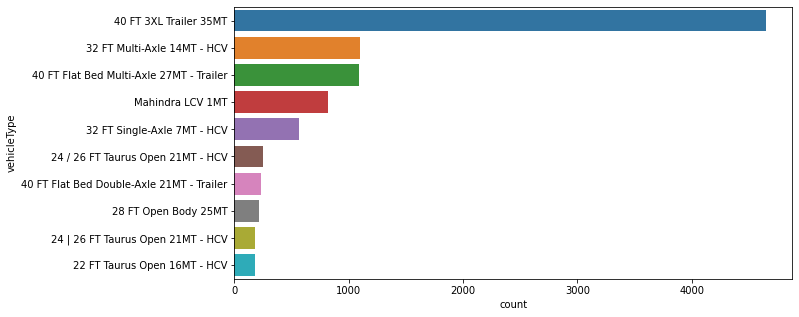

In [4]:
# biểu đồ top 10 loại xe có nhiều mẫu nhất
plt.figure(figsize=(10,5))
sns.countplot(y='vehicleType', data=df, order=df.vehicleType.value_counts().iloc[:10].index)
# plt.xticks(rotation=45)
plt.show()

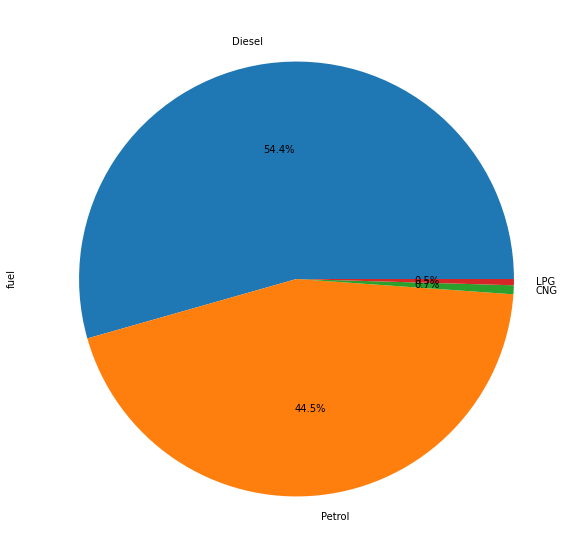

In [5]:
# biểu đồ pie thể hiện loại nhiên liệu được sử dụng cho các loại xe
plt.figure(figsize=(10,10))
df['fuel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Nhận xét: Các loại xe sử dụng 2 loại nhiên liệu chính là Diesel (54.4%) và Petrol (44.5%)

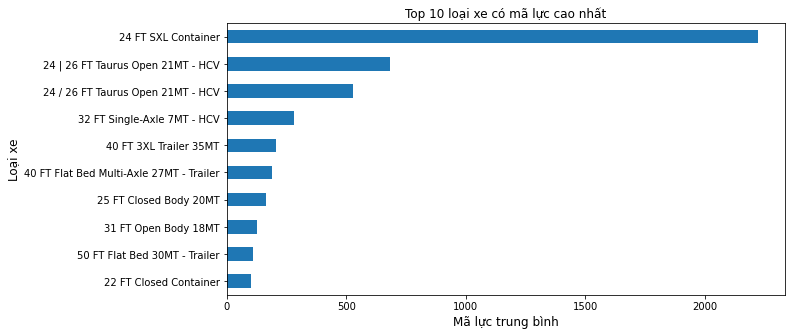

In [6]:
# biểu đồ top 10 loại xe có mã lực cao nhất
plt.figure(figsize=(10,5))
# nhóm các loại xe theo mã lực trung bình
df.groupby('vehicleType')['max_power(bhp)'].mean().sort_values(ascending=False).iloc[:10].plot.barh()
plt.title('Top 10 loại xe có mã lực cao nhất')
plt.xlabel('Mã lực trung bình', fontsize=12)
plt.ylabel('Loại xe', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\2993745184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_charecteristic["selling_price (million $)"] = vehicle_charecteristic["selling_price"] / 1000000
C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\2993745184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_charecteristic["km_driven (in thousands)"] = vehicle_charecteristic["km_driven"] / 1000


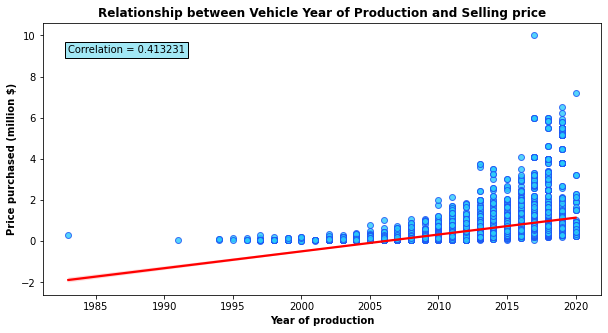

In [7]:
vehicle_charecteristic = df[[ "seller_type", "fuel", "km_driven", "selling_price", "year"]]
vehicle_charecteristic

vehicle_charecteristic["selling_price (million $)"] = vehicle_charecteristic["selling_price"] / 1000000
vehicle_charecteristic["km_driven (in thousands)"] = vehicle_charecteristic["km_driven"] / 1000
vehicle_charecteristic

# Figure 14: Relationship between Year of production & selling price
vehicle_charecteristic[["year", "selling_price (million $)"]].corr()
fig, ax = plt.subplots(figsize = (10,5))
chart_1 = sns.regplot(x = "year", y = "selling_price (million $)", data = vehicle_charecteristic, scatter_kws={"color": "#2acafa", "edgecolor": "#1d53f5"}, line_kws={"color": "red"})
chart_1.set_xlabel("Year of production", fontdict = {"weight":"bold"})
chart_1.set_ylabel("Price purchased (million $)", fontdict = {"weight":"bold"})
plt.text(1983, 9.3, "Correlation = 0.413231", bbox = {"boxstyle": "square", "facecolor": "#a2e8f5", "edgecolor": "black"}, va = "center")
plt.title("Relationship between Vehicle Year of Production and Selling price", fontdict = {"weight":"bold"})
plt.savefig("Figure 14: Production Year & Selling price Relationship.png", bbox_inches= "tight")
plt.show()

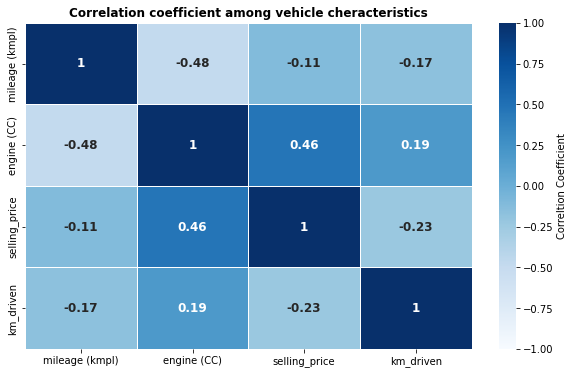

In [8]:
# Figure 15: Correlation coefficient of vehicle
car_info = df[["vehicle_no", "mileage (kmpl)", "engine (CC)", "selling_price", "km_driven"]]
fig, ax = plt.subplots(figsize = (10,6))
mask = np.triu(np.ones_like(car_info.corr()))
ax = sns.heatmap(car_info.corr(), vmin= -1, vmax=1, cmap= "Blues", annot= True, annot_kws= {"fontsize": 12, "fontweight": "bold"}, cbar_kws={"label": "Correltion Coefficient"}, linewidths= 1)
plt.title("Correlation coefficient among vehicle cheracteristics", fontdict= {"fontweight": "bold"})
plt.savefig("Figure 18: Correlation coefficient of vehicle.png", bbox_inches= "tight")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\47347825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_charecteristic["selling_price (million $)"] = vehicle_charecteristic["selling_price"] / 1000000
C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\47347825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_charecteristic["km_driven (in thousands)"] = vehicle_charecteristic["km_driven"] / 1000


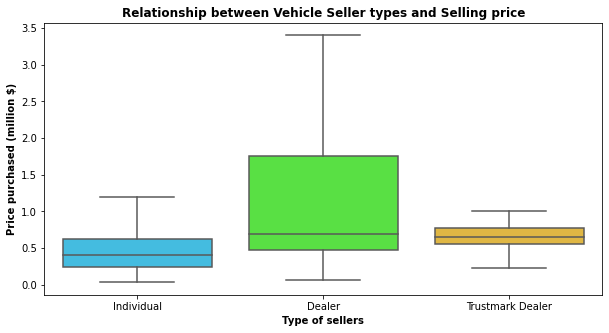

In [9]:
vehicle_charecteristic = df[["seats", "owner", "seller_type", "fuel", "km_driven", "selling_price", "year"]]
vehicle_charecteristic
vehicle_charecteristic["selling_price (million $)"] = vehicle_charecteristic["selling_price"] / 1000000
vehicle_charecteristic["km_driven (in thousands)"] = vehicle_charecteristic["km_driven"] / 1000
vehicle_charecteristic
color = ["#2acafa", "#46fa2a", "#fac32a"]
fig, ax = plt.subplots(figsize = (10,5))
chart_3 = sns.boxplot(x = "seller_type", y = "selling_price (million $)", data= vehicle_charecteristic, palette= color, showfliers=False)
chart_3.set_xlabel("Type of sellers", fontdict = {"weight":"bold"})
chart_3.set_ylabel("Price purchased (million $)", fontdict = {"weight":"bold"})
plt.title("Relationship between Vehicle Seller types and Selling price", fontdict = {"weight":"bold"})
plt.savefig("Figure 9: Seller type & Selling price Relationship.png", bbox_inches= "tight")
plt.show()